# With quantstats

We support and recommend [quantstats](https://github.com/ranaroussi/quantstats)

In [9]:
import pandas as pd

pd.options.plotting.backend = 'plotly'

from cvx.simulator.builder import builder

In [10]:
prices = pd.read_csv("data/stock_prices.csv", header=0, index_col=0, parse_dates=True) 

In [11]:
capital = 1e6

In [12]:
b = builder(prices=prices, initial_cash=capital)

In [13]:
for t, state in b:
    # each day we invest a quarter of the capital in the assets
    b[t[-1]] = (1.0 / len(b.assets)) * state.nav / state.prices

In [14]:
portfolio= b.build()

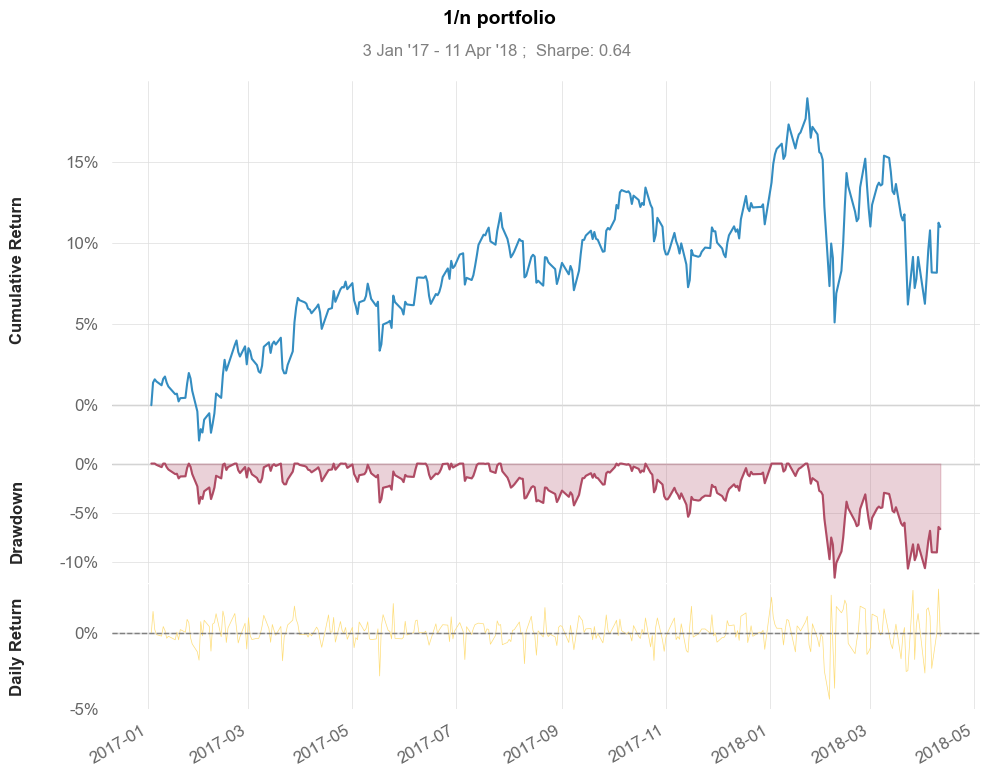

In [21]:
portfolio.snapshot(title="1/n portfolio", fontname=None, show=True)

In [20]:
# show sharpe ratio
print(portfolio.nav.pct_change().sharpe())
print(portfolio.nav.pct_change().dropna().sharpe())
print(portfolio.nav.sharpe())

0.6379901607052793
0.6389878459352839
0.6379901607052793
